In [1]:
import gym
import numpy as np

env = gym.make("MountainCar-v0")
# env.reset() - initial position and initial velocity

alpha = 0.1 # learning rate
discount = 0.95 # discount factor
episodes = 2000 # total episodes
show_every = 500

epsilon = 0.5 # to give more exploration time (introduces randomness)
start_epsilon = 1
end_epsilon = episodes // 2
epsilon_decay = epsilon / (end_epsilon - start_epsilon) # we will decrease epsilon continuosly

# Observable States - position and velocity

# print(env.observation_space.high) stores highest values of position and velocity
# print(env.observation_space.low) stores lowest values of position and velocity
# we might not know the above two for each env

# print(env.action_space.n) - actions possible in our env (here - 0(left),1(stay),2(right))

DISCRETE_OS_SIZE = [20] * len(env.observation_space.high) # len = 2 since 2 observable states
# DISCRETE_OS_SIZE = [20,20]
# done to seperate high to low values into 20 different chunks for each pos and velocity

discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / DISCRETE_OS_SIZE
# we will get the range of each chunk

q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n])) # initial random Q-Table
# size = (20,20,3) - that is for each action all possible combinations of position and velocity

ep_rewards = []
total_ep_rewards = {'ep':[],'avg':[],'min':[],'max':[]}
# min represents worst model performance
# max represent best model performance
# average represents average model performance
# All based on rewards

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int32))

for episode in range(episodes):
    episode_reward = 0
    if episode % show_every==0:
        print(episode)
        render = True
    else:
        render = False
        
    discrete_state = get_discrete_state(env.reset()) # getting initial discrete state
    finish = False

    while not finish:
        if np.random.random() > epsilon: # done to increase exploration
            action = np.argmax(q_table[discrete_state]) # will give you the best action to take
        else:
            action = np.random.randint(0,env.action_space.n) # random action between 0 1 2
            
        new_state,reward,finish,_ = env.step(action)
        # new_state - [position,velocity]
        # if not finished then total reward is -200
        new_discrete_state = get_discrete_state(new_state) # discrete state corresponding to new state
        
        episode_reward += reward # total reward per episode
        
        if render:
            env.render() # render just shows the car moving in pygame window
            
        if not finish:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]

            new_q = ((1 - alpha) * current_q) + (alpha * (reward + (discount * max_future_q))) # Q-Learning Formula

            q_table[discrete_state + (action,)] = new_q

        elif new_state[0] >= env.goal_position:
            # env.goal_position here is 0.5
            print(f"Completed on episode {episode}")
            q_table[discrete_state+(action,)] = 0; # highest possible 

        discrete_state = new_discrete_state
    
    if end_epsilon >= epsilon >= start_epsilon:
        epsilon -= epsilon_decay # decaying to decrease randomness and exploration
    
    ep_rewards.append(episode_reward)
    
    if episode % show_every == 0:
        average_reward = sum(ep_rewards[-show_every:])/len(ep_rewards[-show_every:])
        total_ep_rewards['ep'].append(episode)
        total_ep_rewards['avg'].append(average_reward)
        total_ep_rewards['min'].append(min(ep_rewards[-show_every:]))
        total_ep_rewards['max'].append(max(ep_rewards[-show_every:]))
        print(f"Episode: {episode} Average: {average_reward} Min: {min(ep_rewards[-show_every:])} Max: {max(ep_rewards[-show_every:])}")
    
env.close()

C:\Users\Vidit\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\wrappers\monitoring\video_recorder.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.spawn


0
Episode: 0 Average: -200.0 Min: -200.0 Max: -200.0
500
Episode: 500 Average: -200.0 Min: -200.0 Max: -200.0
1000
Episode: 1000 Average: -200.0 Min: -200.0 Max: -200.0
Completed on episode 1459
1500
Episode: 1500 Average: -199.944 Min: -200.0 Max: -172.0
Completed on episode 1589
Completed on episode 1963
Completed on episode 1972


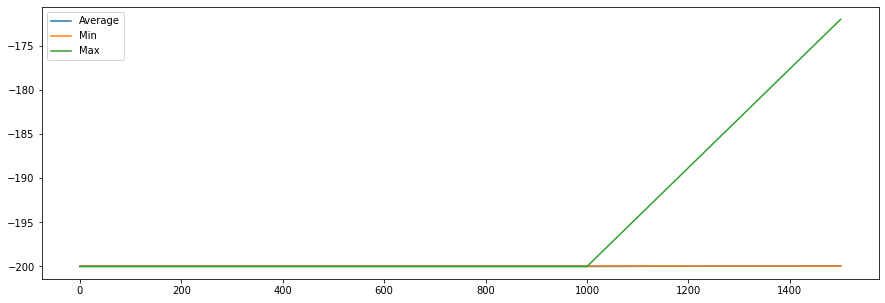

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(total_ep_rewards['ep'],total_ep_rewards['avg'],label="Average")
plt.plot(total_ep_rewards['ep'],total_ep_rewards['min'],label="Min")
plt.plot(total_ep_rewards['ep'],total_ep_rewards['max'],label="Max")
plt.legend(loc=2)
plt.show()